# Classifiez automatiquement des biens de consommation - PLACE DE MARCHE
# Notebook 1 - Faisabilité TEXTE
# Fonctions permettant le prétraitement et la feature extraction des données textes et images ainsi que les résultats de l’étude de faisabilité (graphiques, mesure de similarité) 

# <a name="C0">SOMMAIRE</a>

# PARTIE 1 - 1er ESSAI

## Travail préparatoire
### <a href="#C1">1. Set up Environnement</a>
### <a href="#C2">2. Travail sur le texte</a>
### <a href="#C3">3. Preprocessing du texte </a>

## Différents encodages
### <a href="#C4">4. Bag of words et TF-IDF</a>
### <a href="#C5">5. word vectors (doc2vec, word2vec)</a>
### <a href="#C6">6. Modèle BERT</a>
### <a href="#C7">7. Modèle USE</a>

# PARTIE 2 - 2eme ESSAI

### Données et Source :
Les données
https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+pre%CC%81traitement+textes+images.zip

Notebook d'exemple pour la faisabilité : 
https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P6/Weather_Images_CNN_Transfer_Learning_Stage_1_feasibility_V1.0.ipynb



### Ce qu'il faut faire :


#### 1) Fonctions de prétraitement et explorations
Un ou des notebooks (ou des fichiers .py) contenant les fonctions permettant le prétraitement et la feature extraction des données textes et images ainsi que les résultats de l’étude de faisabilité (graphiques, mesure de similarité) 


#### 2) Un notebook de classification supervisée des images
Un notebook (ou code commenté au choix) d’essais des différentes approches de modélisation (non cleané, pour comprendre votre démarche).

#### 3)Un script Python (notebook ou fichier .py) de test de l’API et le fichier au format “csv” contenant les produits extraits
Un notebook de simulation pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation.

#### 4) Présentation
Un support de présentation détaillant le travail réalisé



### Concernant la propriété intélectuelle =>  à mettre dans la présentation 
Mail de Linda, Lead Data Scientist
"PS : J’ai bien vérifié qu’il n’y avait aucune contrainte de propriété intellectuelle sur les données et les images."


# - - - - - - - TRAVAIL PREPARATOIRE - - - - - - - -

# <a name="C1">1. Set up environnement</a>
<a href="#C0">SOMMAIRE</a>

In [1]:
#Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import isnan
import scipy.stats
%matplotlib inline

#Réglages d'affichage
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 2000)

# Rappel du thème utilisé
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
#Import des données
flipkart_df = pd.read_csv('C:/Users/Me/Documents/1- DATA SCIENCE/Projet 6/source/flipkart_com-ecommerce_sample_1050.csv')

# <a name="C2">2. Travail sur le texte</a>
<a href="#C0">SOMMAIRE</a>

In [3]:
flipkart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [4]:
flipkart_df.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multicolor""}, {""key""=>""Length"", ""value""=>""213 cm""}, {""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""2 Curtains""}, {""key""=>""Material"", ""value""=>""Polyester""}]}"


In [5]:
#création d'une copie pour pouvoir revenir au fichier initial si besoin
df=flipkart_df.copy()
df=df[['product_name','product_category_tree','description','image']]
#on isole la catégorie en créant une nouvelle variable
df['category']=(df.product_category_tree.str[2:-2].str.split(' >> ')).map(lambda x: x[0])
df.category.unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [6]:
df['category'].value_counts()

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: category, dtype: int64

In [7]:
#on assemble product_name et description
df['text']=df.apply(lambda row: str(row['product_name']) + ' ' + str(row['description']), axis=1)
df.text[0]

'Elegance Polyester Multicolor Abstract Eyelet Door Curtain Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant

In [8]:
#je vérifie qu'il n'y a pas des produits avec des noms trop courts
df.product_name[df['product_name'].str.len() < 10]

250    TRUE Bong
335     Tenda A5
355     Tenda A6
Name: product_name, dtype: object

In [9]:
#idem avec les descriptions
df.description[df['description'].str.len() < 30]

Series([], Name: description, dtype: object)

# <a name="C3">3. Preprocessing du texte</a>
<a href="#C0">SOMMAIRE</a>

In [10]:
#importations

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import re

nltk.download('stopwords')
nltk.download('punkt')

#fonction de preprocessing 

def preprocess_text(text):
    # Conversion en minuscules
    text = text.lower()
    
    # Suppression de la ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenisation des mots
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    
    # Suppression des stopwords
    english_stopwords = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in english_stopwords]
    
    # Suppression des mots de moins de 3 lettres
    filtered_tokens = [token for token in filtered_tokens if len(token) >= 3]
    
    # Stemming
    stemmer = SnowballStemmer('french')
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    # Suppression des caractères non alphabétiques
    alpha_tokens = [re.sub('[^a-zA-Z]', '', token) for token in stemmed_tokens]
    
    # Suppression des chaînes de texte vides
    alpha_tokens = [token for token in alpha_tokens if token]
    
    return alpha_tokens


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Me\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Me\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
preprocess_text(df['text'][0])

['eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtaineleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'pric',
 'curtain',
 'enhanc',
 'look',
 'interiorsth',
 'curtain',
 'mad',
 'high',
 'quality',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'styl',
 'stitch',
 'metal',
 'ring',
 'mak',
 'room',
 'environment',
 'romantic',
 'lovingth',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'apparanceg',
 'hom',
 'bright',
 'modernistic',
 'appeal',
 'design',
 'surreal',
 'attent',
 'sur',
 'steal',
 'heart',
 'contemporary',
 'eyelet',
 'valanc',
 'curtain',
 'slid',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whol',
 'world',
 'draw',
 'clos',
 'evening',
 'creat',
 'special',
 '

In [12]:
#maintenant je vais mettre le text préprocessé dans mon dataframe
df['prep_text']=df['text'].apply(lambda x : preprocess_text(x))
df

,product_name,product_category_tree,description,image,category,text,prep_text
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]","Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,"Elegance Polyester Multicolor Abstract Eyelet Door Curtain Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester","[eleg, polyest, multicolor, abstract, eyelet, door, curtain, key, featur, eleg, polyest, multicolor, abstract, eyelet, door, curtain, floral, curtaineleg, polyest, multicolor, abstract, eyelet, door, curtain, height, pack, pric, curtain, enhanc, look, interiorsth, curtain, mad, high, quality, polyest, fabric, featur, eyelet, styl, stitch, metal, ring, mak, room, environment, romantic, lovingth, curtain, ant, wrinkl, anti, shrinkag, eleg, apparanceg, hom, bright, modernistic, appeal, design, surreal, attent, sur, steal, heart, contemporary, eyelet, valanc, curtain, slid, smoothly, draw, apart, first, thing, morning, welcom, bright, sun, ray, want, wish, good, morning, whol, world, draw, clos, evening, creat, special, moment, joyous, beauty, given, soothing, print, bring, hom,

In [13]:
#regardons le vocabulaire du texte
all_words=[]
for text in df.prep_text :
    all_words += text
    
vocabulary=set(all_words)
len(vocabulary)

4967

In [14]:
#maintenant je vais compter leurs occurences
count_words=[]
for word in vocabulary :
    count_words.append(all_words.count(str(word)))
    
len(count_words)

4967

In [15]:
words_count=pd.DataFrame({'vocabulary': list(vocabulary), 'count_words': count_words})
words_count.sort_values('count_words',ascending=False).head(70)

,vocabulary,count_words
1060,product,869
3590,fre,616
4922,buy,582
4301,replac,572
4419,delivery,567
2317,cash,564
3606,shipping,564
2012,genuin,564
4825,pric,559
377,day,555


In [16]:
#je créer une liste des mots à retirer, ignorer du vocabulaire 
#list(words_count.sort_values('count_words',ascending=False).head(70).iloc[:,0])
words_to_remove=['for',
 'the',
 'and',
 'with',
 'only',
 'product',
 'your',
 'fre',
 'buy',
 'replac',
 'delivery',
 'shipping',
 'cash',
 'flipkartcom',
 'set',
 'this',
 'from',
 'you',
 'typ',
 'box',
 'packag',
 'sal',
 'quality',
 'are',
 'not',
 'that']

In [17]:
#je fais une nouvelle fonction de pour enlever les mots du text une fois preprocessed
def removewords_text(text,words_to_remove):
    # Suppression des words_to_remove
    filtered_words = [token for token in text if token not in words_to_remove]
    return filtered_words


In [18]:
#maintenant je vais mettre le text sans les mots dans mon dataframe
df['prep2_text']=df['prep_text'].apply(lambda x : removewords_text(x,words_to_remove))
df

,product_name,product_category_tree,description,image,category,text,prep_text,prep2_text
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]","Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,"Elegance Polyester Multicolor Abstract Eyelet Door Curtain Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester","[eleg, polyest, multicolor, abstract, eyelet, door, curtain, key, featur, eleg, polyest, multicolor, abstract, eyelet, door, curtain, floral, curtaineleg, polyest, multicolor, abstract, eyelet, door, curtain, height, pack, pric, curtain, enhanc, look, interiorsth, curtain, mad, high, quality, polyest, fabric, featur, eyelet, styl, stitch, metal, ring, mak, room, environment, romantic, lovingth, curtain, ant, wrinkl, anti, shrinkag, eleg, apparanceg, hom, bright, modernistic, appeal, design, surreal, attent, sur, steal, heart, contemporary, eyelet, valanc, curtain, slid, smoothly, draw, apart, first, thing, morning, welcom, bright, sun, ray, want, wish, good, morning, whol, world, draw, clos, evening, creat, special, moment, joyous, beauty, given, soothing, print, 

In [19]:
#fonction pour afficher les N mots les plus, les moins fréquents.
def n_most_less_frequent_words(corpora,n) :
    #regardons le vocabulaire du texte
    all_words=[]
    for text in corpora :
        all_words += text
    
    vocabulary=set(all_words)
    vocabulary_size=len(vocabulary)
    print('Nombre total de mot : {}.'.format(vocabulary_size))
    #maintenant je vais compter leurs occurences
    count_words=[]
    for word in vocabulary :
        count_words.append(all_words.count(str(word)))
    #maintenant je stocke les fréquences
    freq_words=[x/vocabulary_size for x in count_words]
    #maintenant je fais un dataframe pour les trier
    words_count=pd.DataFrame({'vocabulary': list(vocabulary), 'count_words': count_words, 'freq_words' : freq_words})
    print('Les {} mots les plus fréquents :'.format(n))
    print(words_count.sort_values('count_words',ascending=False).head(n))
    print('Les {} mots les moins fréquents :'.format(n))
    print(words_count.sort_values('count_words',ascending=True).head(n))
    return words_count

In [20]:
words_count_2=n_most_less_frequent_words(df.prep2_text,100)

Nombre total de mot : 4949.
Les 100 mots les plus fréquents :
      vocabulary  count_words  freq_words
2004      genuin          564    0.113962
4808        pric          559    0.112952
376          day          555    0.112144
4146         mug          525    0.106082
46         watch          511    0.103253
4321    guarante          471    0.095171
4336        baby          413    0.083451
2819      featur          403    0.081431
2237       onlin          396    0.080016
1822      analog          382    0.077187
849        color          371    0.074965
2842      cotton          341    0.068903
2502        pack          331    0.066882
977           rs          319    0.064457
3063      design          315    0.063649
4684        girl          314    0.063447
2969    showpiec          312    0.063043
1589    material          307    0.062033
2594     ceramic          295    0.059608
2577     general          288    0.058194
2982      laptop          273    0.055163
4722         m

In [21]:
words_to_remove_2=list(words_count_2[words_count_2.count_words<6]['vocabulary'])
words_to_remove_2

['snap',
 'milton',
 'playing',
 'junior',
 'durablebel',
 'reaching',
 'anything',
 'absolut',
 'ogx',
 'wra',
 'deserv',
 'arrival',
 'jmqlug',
 'diseas',
 'bread',
 'pres',
 'promis',
 'flviredcx',
 'napkin',
 'tigispecif',
 'gas',
 'dusty',
 'lithium',
 'restitch',
 'usespecif',
 'puj',
 'saint',
 'escort',
 'perfum',
 'flvigreencx',
 'barcod',
 'curated',
 'portfolio',
 'named',
 'femalesspecif',
 'precious',
 'bdoaspk',
 'memor',
 'ireei',
 'century',
 'tiddly',
 'organiz',
 'enamel',
 'handjuicercombo',
 'tanag',
 'activ',
 'collected',
 'weldecor',
 'interesting',
 'sahar',
 'toward',
 'closurebutton',
 'hybrid',
 'pricechocoberry',
 'review',
 'fil',
 'antislip',
 'delight',
 'danc',
 'tapawir',
 'flmhblackcx',
 'going',
 'arwna',
 'embossed',
 'guided',
 'galaxy',
 'roomspecif',
 'fashionin',
 'adf',
 'yellowblu',
 'wouldnt',
 'diluted',
 'subscript',
 'horizon',
 'charact',
 'ultimat',
 'ducjugducgl',
 'poppin',
 'purposebourn',
 'pamp',
 'mukut',
 'moist',
 'wish',
 'protoc

In [22]:
#Je vais supprimer les mots qui apparaissent moins de 5 fois.
df['prep3_text']=df['prep2_text'].apply(lambda x : removewords_text(x,words_to_remove_2))
df

,product_name,product_category_tree,description,image,category,text,prep_text,prep2_text,prep3_text
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]","Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,"Elegance Polyester Multicolor Abstract Eyelet Door Curtain Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester","[eleg, polyest, multicolor, abstract, eyelet, door, curtain, key, featur, eleg, polyest, multicolor, abstract, eyelet, door, curtain, floral, curtaineleg, polyest, multicolor, abstract, eyelet, door, curtain, height, pack, pric, curtain, enhanc, look, interiorsth, curtain, mad, high, quality, polyest, fabric, featur, eyelet, styl, stitch, metal, ring, mak, room, environment, romantic, lovingth, curtain, ant, wrinkl, anti, shrinkag, eleg, apparanceg, hom, bright, modernistic, appeal, design, surreal, attent, sur, steal, heart, contemporary, eyelet, valanc, curtain, slid, smoothly, draw, apart, first, thing, morning, welcom, bright, sun, ray, want, wish, good, morning, whol, world, draw, clos, evening, creat, special, moment, joyous, beauty, given, soothi

In [23]:
words_count_3=n_most_less_frequent_words(df.prep3_text,30)

Nombre total de mot : 1440.
Les 30 mots les plus fréquents :
     vocabulary  count_words  freq_words
934      genuin          564    0.391667
1295       pric          559    0.388194
435         day          555    0.385417
521         mug          525    0.364583
45        watch          511    0.354861
734    guarante          471    0.327083
755        baby          413    0.286806
431      featur          403    0.279861
1208      onlin          396    0.275000
696      analog          382    0.265278
974       color          371    0.257639
452      cotton          341    0.236806
50         pack          331    0.229861
1113         rs          319    0.221528
720      design          315    0.218750
1180       girl          314    0.218056
581    showpiec          312    0.216667
406    material          307    0.213194
173     ceramic          295    0.204861
147     general          288    0.200000
612      laptop          273    0.189583
1215        men          254    0.176

## Préparation pour la suite

In [24]:
#import
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing## for explainer
import gensim
import gensim.downloader as gensim_api## for deep learning


In [25]:
data=df[['category','prep3_text']].copy()
data['prep3_text']=data['prep3_text'].apply(lambda x : ' '.join(x))
data.rename(columns={'category':'y','prep3_text':'text'},inplace=True)
corpus = data.text


# - - - - - - - TRAVAIL PREPARATOIRE - - - - - - - -
# <a name="C4">4. Bag of words et TF-IDF</a>
<a href="#C0">SOMMAIRE</a>

In [26]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score as ARI

In [27]:
#clustering non supervisé avec un kmeans fixé à 7 clusters sur X, prédictions vs réalité via indice de rand 
def test_kmeans_vs_model(X,Y) :
    
    #  X correspond ici aux données sans étiquettes
    #  Y correspond aux vraies étiquettes
    
    #on fait le kmeans sur X et on récupère les étiquettes prédites par kmeans
    kmeans = KMeans(n_clusters=7, random_state=0, n_init="auto").fit(X)
    predictions=kmeans.labels_
    
     #score pour comparaison
    indice_rand=ARI(Y,predictions)
    print("L'indice de Rand est de {}.".format(round(indice_rand,5)))
    
    #on entraine un TSNE sur le X
    tsne = TSNE(n_components=2,init='random')
    T = tsne.fit_transform(X)
    
    #on prépare les deux graphiques 
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
    
    #on affiche le TSNE avec les vrais étiquettes
    ax1.set_title('Vraies catégories')
    sns.scatterplot(T[:,0], T[:,1],hue=Y, palette="Set1", ax=ax1)
    
    #on affiche le TSNE avec les étiquettes prédites
    ax2.set_title('Clustering k-means')
    sns.scatterplot(T[:,0], T[:,1],hue=predictions, palette="Set1", ax=ax2)
    plt.show()
    
    return indice_rand
    
    

### Bag of Words

L'indice de Rand est de 0.13546.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


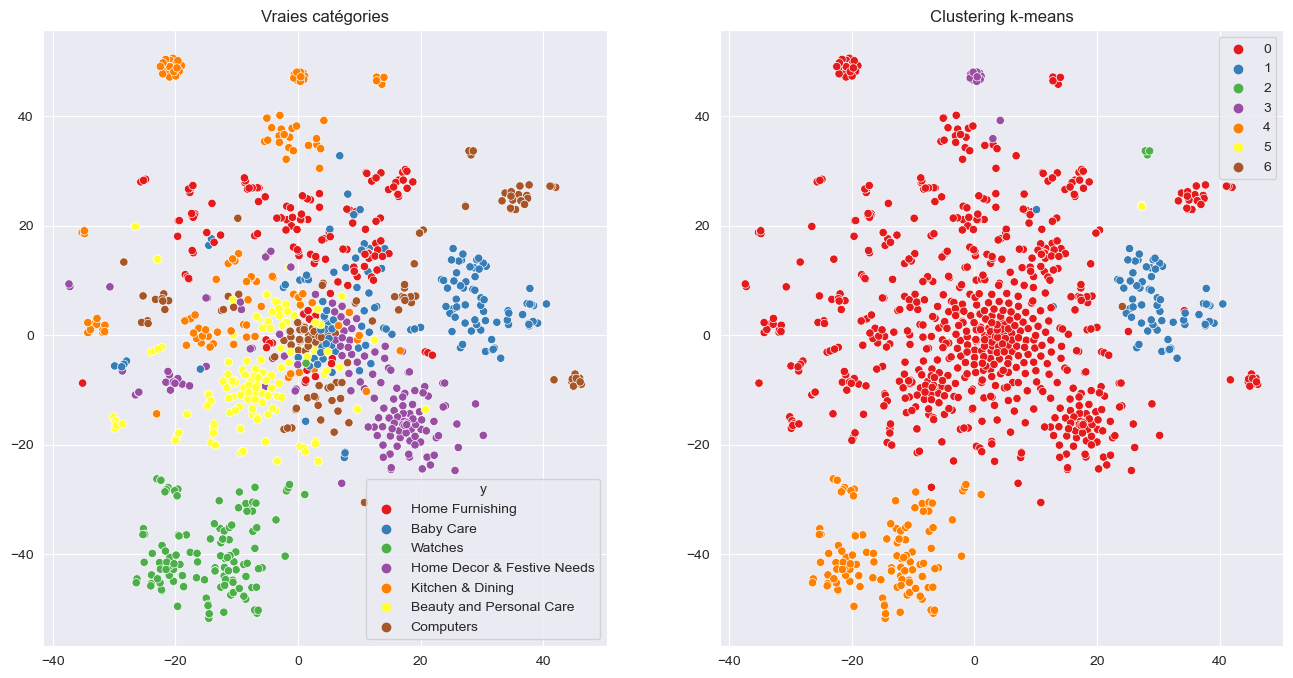

In [28]:
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))
#train le modèle
vectorizer.fit(corpus)
X = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_
BoW=test_kmeans_vs_model(X,data.y)

In [29]:
resultats = pd.DataFrame(columns=['Nom du modèle', 'indice_rand'])

In [30]:
resultats.loc[len(resultats)] = [str('Bag of Words'), round(BoW,5)]
resultats

,Nom du modèle,indice_rand
0,Bag of Words,0.13546


### TFIDF

In [31]:
#definir le modèle
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))
#train le modèle
vectorizer.fit(corpus)
X = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

L'indice de Rand est de 0.32654.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


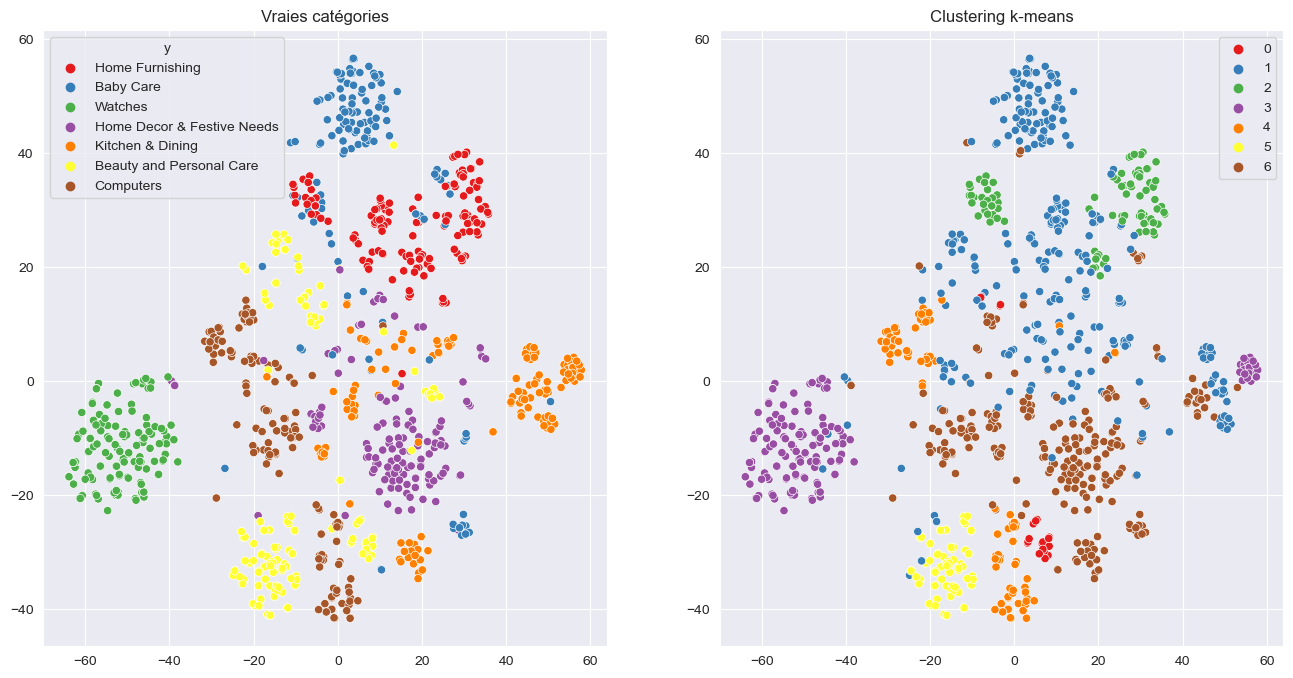

In [32]:
TFIDF=test_kmeans_vs_model(X,data.y)

In [33]:
resultats.loc[len(resultats)] = [str('TFIDF'), round(TFIDF,5)]
resultats

,Nom du modèle,indice_rand
0,Bag of Words,0.13546
1,TFIDF,0.32654


# <a name="C5">5. Word vectors (doc2vec, word2vec)</a>
<a href="#C0">SOMMAIRE</a>

In [34]:
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

L'indice de Rand est de 0.39308.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


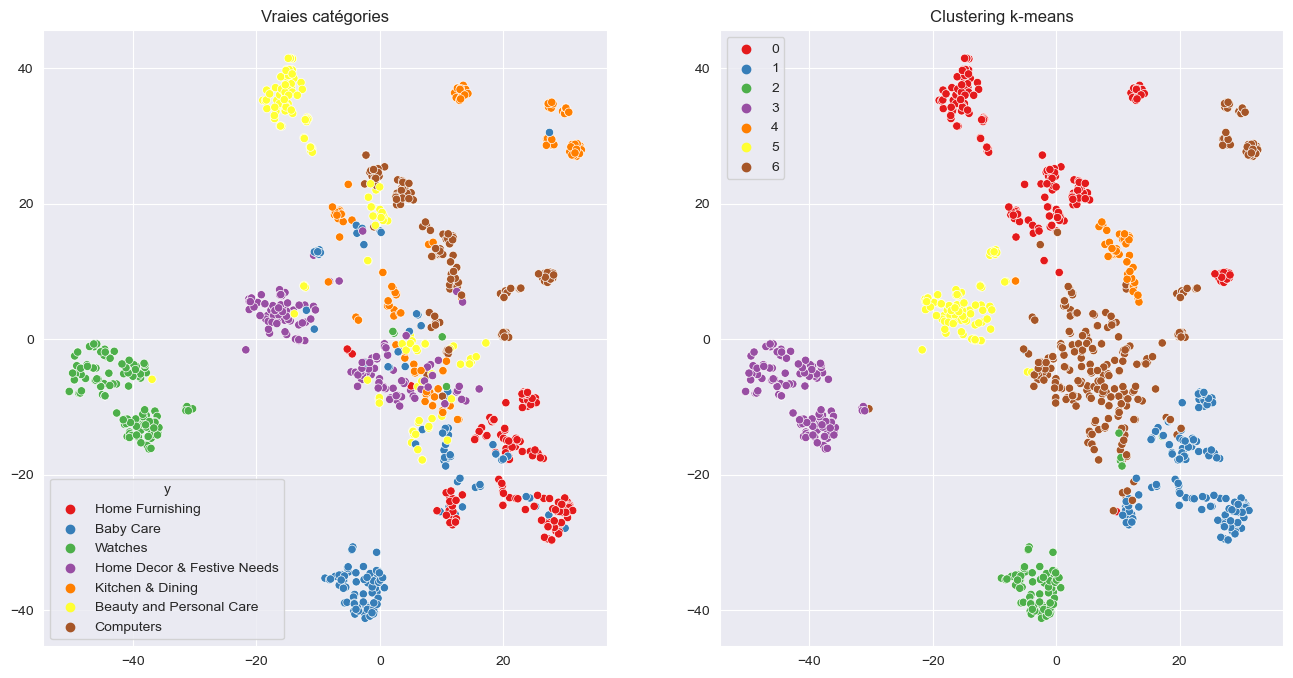

In [35]:
from nltk.tokenize import word_tokenize

# Tokenize corpus
tokenized_corpus = [doc.split() for doc in corpus]

# Create a Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4, epochs=20)

# Get the embeddings of each document
embedding_matrix = []
for doc in tokenized_corpus:
    embeddings = []
    for word in doc:
        if word in model.wv:
            embeddings.append(model.wv[word])
    if embeddings:
        embedding_matrix.append(np.mean(embeddings, axis=0))
    else:
        embedding_matrix.append(np.zeros(100)) # if no word in model vocab, use zero vector

embedding_matrix = np.array(embedding_matrix)

Word2Vec=test_kmeans_vs_model(embedding_matrix,data.y)

In [36]:
resultats.loc[len(resultats)] = [str('Word2Vec'), round(Word2Vec,5)]
resultats

,Nom du modèle,indice_rand
0,Bag of Words,0.13546
1,TFIDF,0.32654
2,Word2Vec,0.39308


# <a name="C6">6. Modèle BERT</a>
<a href="#C0">SOMMAIRE</a>

In [37]:
#fonction de preprocessing pour deep learning

def preprocess_text_deep(text):
    # Conversion en minuscules
    text = text.lower()
    
    # Tokenisation des mots
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    
    # Suppression des caractères non alphabétiques
    alpha_tokens = [re.sub('[^a-zA-Z]', '', token) for token in tokens]
    
    # Suppression des chaînes de texte vides
    alpha_tokens = [token for token in alpha_tokens if token]
    
    return tokens

df['prep_text_deep']=df['text'].apply(lambda x : preprocess_text_deep(x))
corpus_deep=df['prep_text_deep'].apply(lambda x : ' '.join(x))

In [38]:
# verify GPU availability
import tensorflow as tf

#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

from transformers import BertModel, BertTokenizer
import torch

In [39]:
# Charger le tokenizer BERT pré-entraîné
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Charger le modèle BERT pré-entraîné
model = BertModel.from_pretrained('bert-base-uncased')

# Encodage des données avec BERT
encoded_corpus = []

for text in corpus:
    encoded_text = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    encoded_corpus.append(encoded_text)

# Obtenir les embeddings des textes
embeddings = []

for encoded_text in encoded_corpus:
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']

    # Passez les tensors à BERT pour obtenir les embeddings
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Récupérez les embeddings (par exemple, les embeddings de la couche cachée précédente)
    hidden_states = outputs.last_hidden_state

    # Calculez une représentation agrégée des embeddings (par exemple, moyenne des embeddings)
    aggregated_embedding = torch.mean(hidden_states, dim=1)

    embeddings.append(aggregated_embedding)

    X = np.vstack([embedding.numpy() for embedding in embeddings])
X.shape

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(1050, 768)

L'indice de Rand est de 0.2581.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


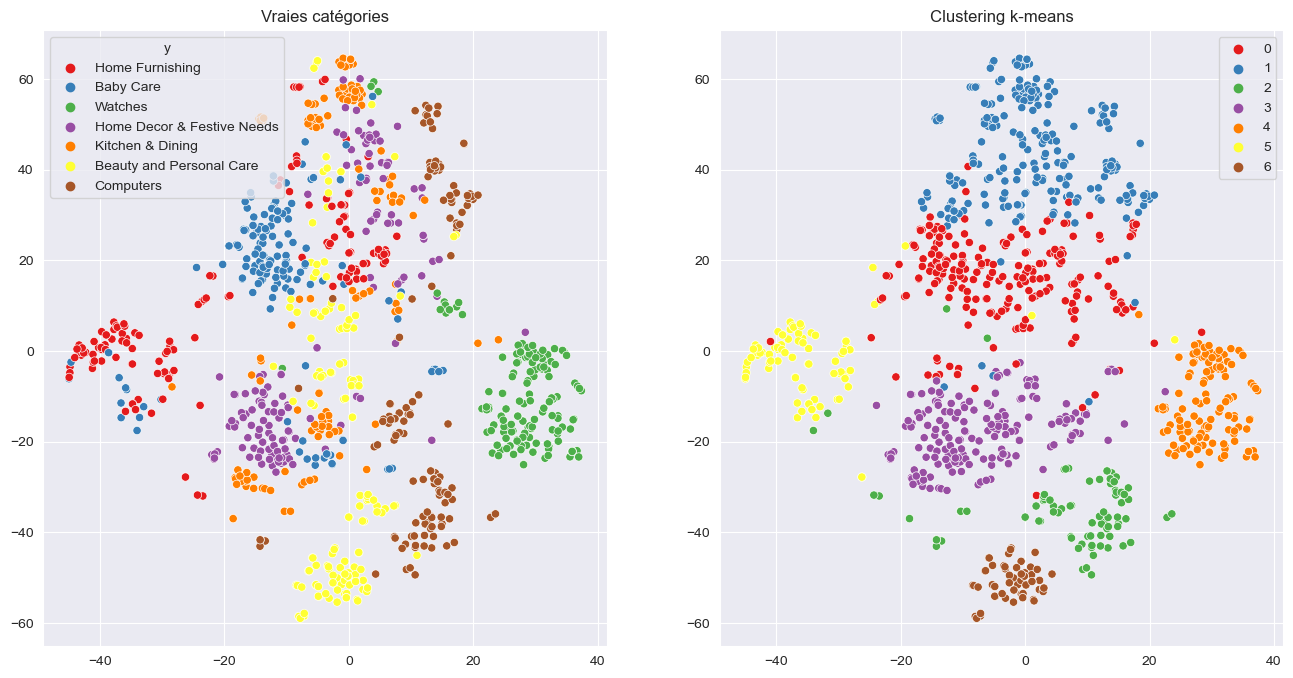

In [40]:
bert=test_kmeans_vs_model(X,data.y)

In [41]:
resultats.loc[len(resultats)] = [str('Bert'), round(bert,5)]
resultats

,Nom du modèle,indice_rand
0,Bag of Words,0.13546
1,TFIDF,0.32654
2,Word2Vec,0.39308
3,Bert,0.25810


# <a name="C7">7. Modèle USE</a>
<a href="#C0">SOMMAIRE</a>

In [42]:
import tensorflow as tf
import tensorflow_hub as hub

In [43]:
use_model = hub.load('C:/Users/Me/Documents/1- DATA SCIENCE/Projet 6/source/model')

In [44]:
encoded_corpus = []

for text in corpus_deep:
    encoded_text = use_model([text])
    encoded_corpus.append(encoded_text)
    
X = tf.concat([embedding for embedding in encoded_corpus], axis=0)
X = X.numpy()

L'indice de Rand est de 0.30766.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


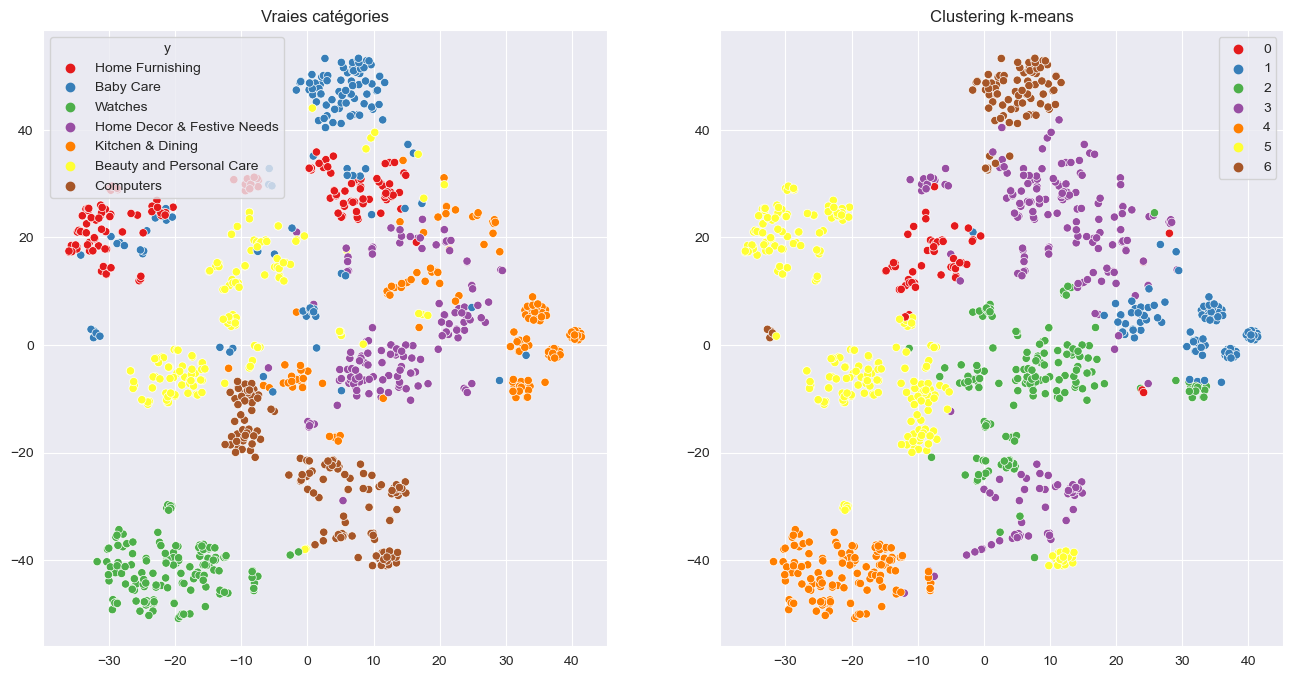

In [45]:
USE=test_kmeans_vs_model(X,data.y)

In [46]:
resultats.loc[len(resultats)] = [str('Useby  corpus_deep'), round(USE,5)]
resultats

,Nom du modèle,indice_rand
0,Bag of Words,0.13546
1,TFIDF,0.32654
2,Word2Vec,0.39308
3,Bert,0.25810
4,Useby corpus_deep,0.30766


# --------------------------------------------------------
# PARTIE 2 

In [47]:
df.text

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Elegance Polyester Multicolor Abstract Eyelet Door Curtain Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curt

In [49]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [54]:
df['sentence_bow'] = df['text'].apply(lambda x : transform_bow_fct(x))
df['sentence_bow_lem'] = df['text'].apply(lambda x : transform_bow_lem_fct(x))
df['sentence_dl'] = df['text'].apply(lambda x : transform_dl_fct(x))
df.shape

(1050, 13)

In [53]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Me\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Me\AppData\Roaming\nltk_data...


True

## Bag of word - tfid

In [55]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(df[feat])
ctf_fit = ctf.fit(df[feat])

cv_transform = cvect.transform(df[feat])  
ctf_transform = ctf.transform(df[feat])  

L'indice de Rand est de 0.25534.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


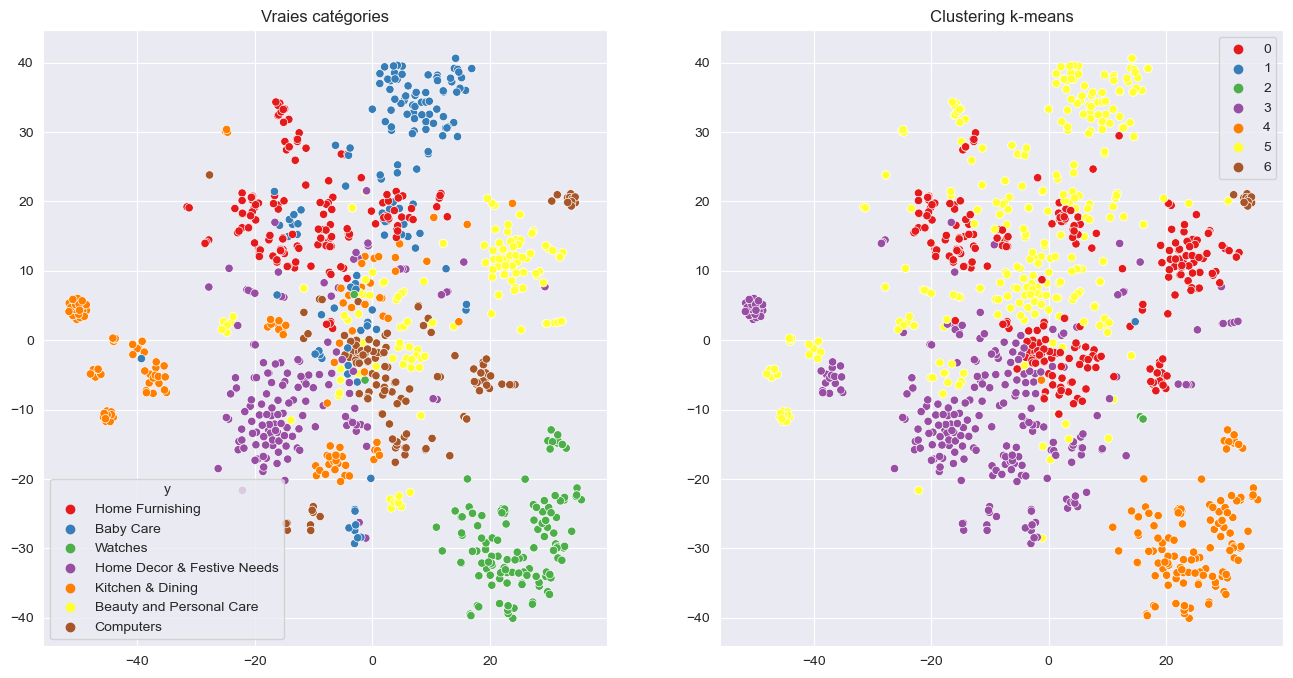

,Nom du modèle,indice_rand
0,Bag of Words bis,0.25534


In [57]:
resultatsbis = pd.DataFrame(columns=['Nom du modèle', 'indice_rand'])
BoWbis=test_kmeans_vs_model(cv_transform,data.y)
resultatsbis.loc[len(resultatsbis)] = [str('Bag of Words bis'), round(BoWbis,5)]
resultatsbis

L'indice de Rand est de 0.19915.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


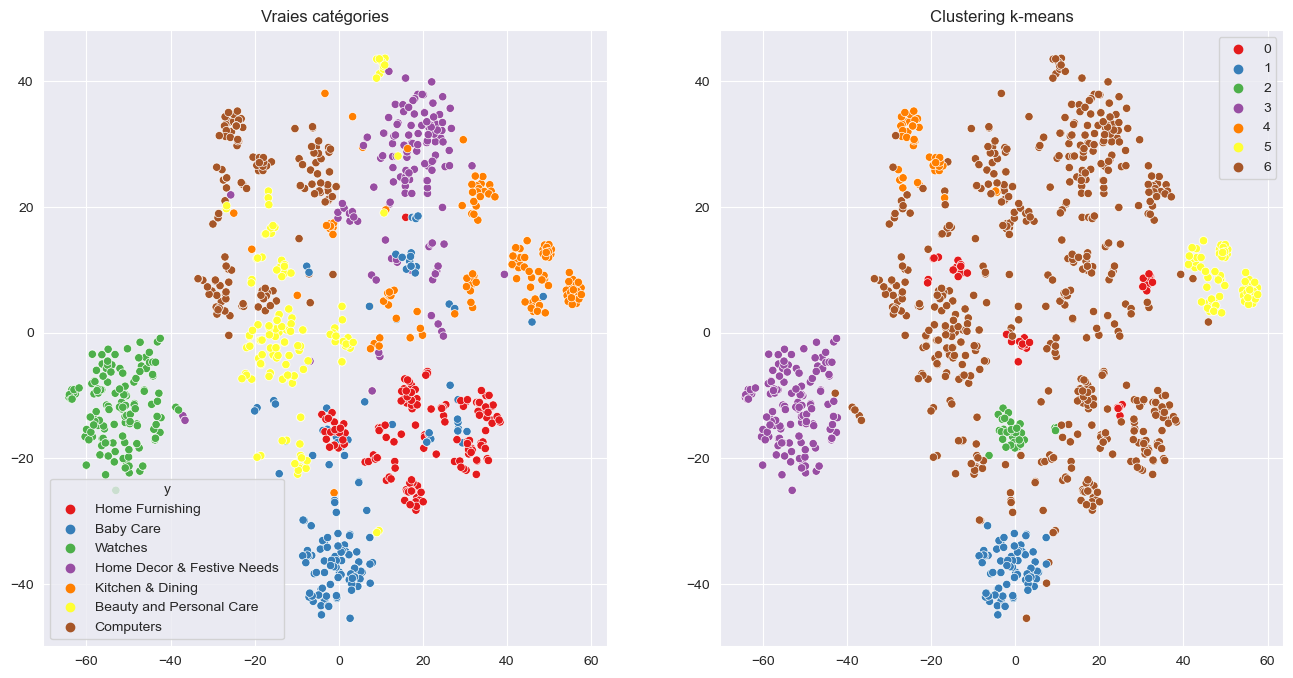

,Nom du modèle,indice_rand
0,Bag of Words bis,0.25534
1,TF IDF bis,0.19915


In [58]:
tfidfbis=test_kmeans_vs_model(ctf_transform,data.y)
resultatsbis.loc[len(resultatsbis)] = [str('TF IDF bis'), round(tfidfbis,5)]
resultatsbis

## Word 2 vec

In [59]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
sentences = df['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [60]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4712
Word2Vec trained


In [62]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4713


In [63]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4713, 300)


In [78]:
maxlen=376
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 376)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 376, 300)          1413900   
                                                                 
 global_average_pooling1d_4   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


In [79]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 7ms/step


(1050, 300)

L'indice de Rand est de 0.06547.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


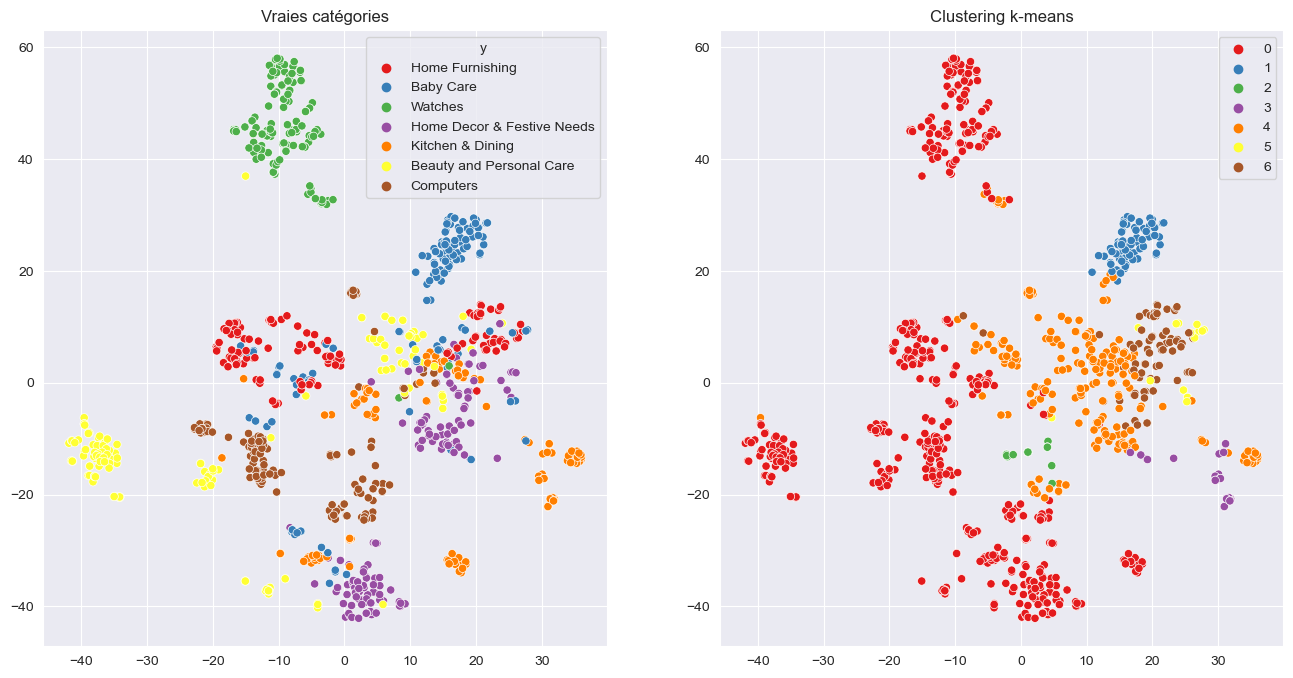

,Nom du modèle,indice_rand
0,Bag of Words bis,0.25534
1,TF IDF bis,0.19915
2,Word 2 Vec bis,0.06547


In [80]:
word2vecbis=test_kmeans_vs_model(embeddings,data.y)
resultatsbis.loc[len(resultatsbis)] = [str('Word 2 Vec bis'), round(word2vecbis,5)]
resultatsbis

## BERT

In [81]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

C:\Users\Me\AppData\Roaming\Python\Python39\site-packages\transformers\generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
C:\Users\Me\AppData\Roaming\Python\Python39\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [82]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.12.0
2.12.0
Num GPUs Available:  0
False


In [83]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [84]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df['sentence_dl'].to_list()

loading configuration file config.json from cache at C:\Users\Me/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



C:\Users\Me\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Me\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
loading weights file tf_model.h5 from cache at C:\Users\Me/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c

In [86]:
import time
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\Me/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Me/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt
loa

1/1 [==============================] - 1s 718ms/step
temps traitement :  101.0


L'indice de Rand est de 0.32155.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


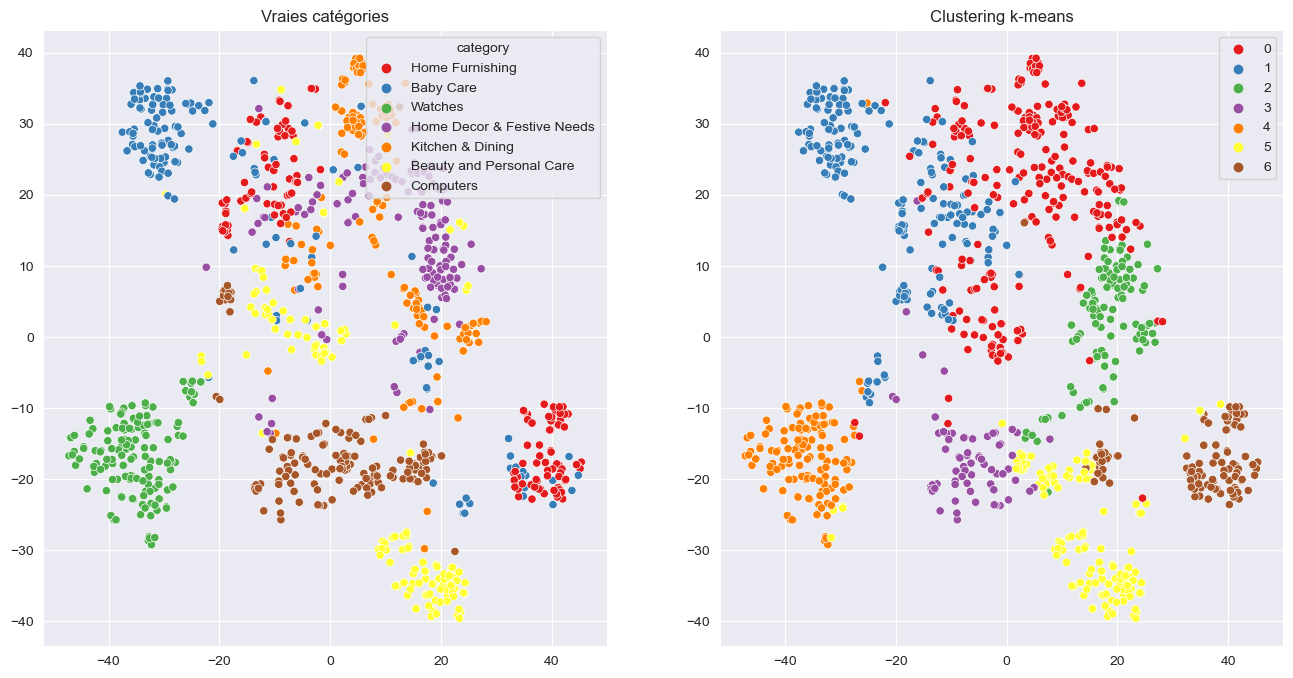

,Nom du modèle,indice_rand
0,Bag of Words bis,0.25534
1,TF IDF bis,0.19915
2,Word 2 Vec bis,0.06547
3,BERT bis,0.32155


In [91]:
BERTbis=test_kmeans_vs_model(features_bert,df.category)
resultatsbis.loc[len(resultatsbis)] = [str('BERT bis'), round(BERTbis,5)]
resultatsbis

## USE model

In [92]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [93]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.12.0
2.12.0
Num GPUs Available:  0
False


In [94]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [95]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [96]:
batch_size = 10
sentences = df['sentence_dl'].to_list()

In [97]:
features_USE = feature_USE_fct(sentences, batch_size)

L'indice de Rand est de 0.31724.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


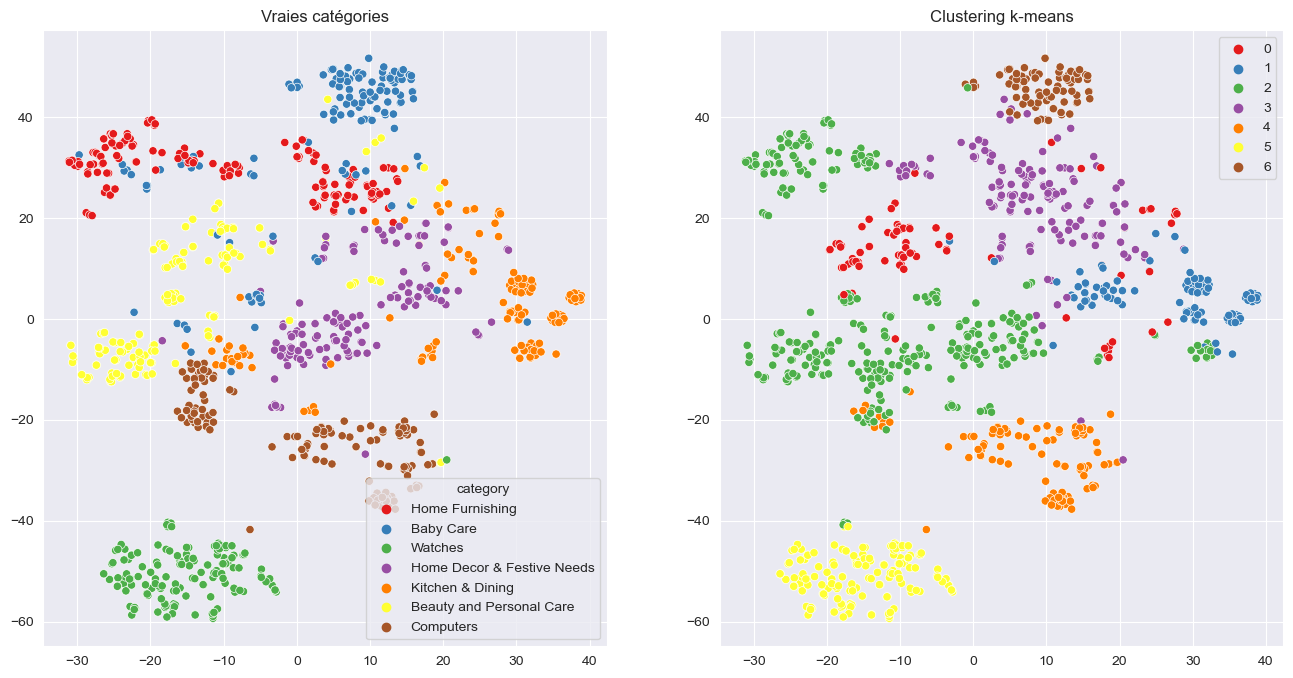

,Nom du modèle,indice_rand
0,Bag of Words bis,0.25534
1,TF IDF bis,0.19915
2,Word 2 Vec bis,0.06547
3,BERT bis,0.32155
4,USE bis,0.31724


In [98]:
USEbis=test_kmeans_vs_model(features_USE,df.category)
resultatsbis.loc[len(resultatsbis)] = [str('USE bis'), round(USEbis,5)]
resultatsbis